<a href="https://colab.research.google.com/github/juancarlosmontesdeoca/Decision-Tree-Project/blob/main/Decision_Tree_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Project

In [122]:
!pip install tableone


In [163]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from tableone import TableOne
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score



 **Análisis exploratorio de Datos (EDA)**

In [124]:
url= "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"

In [125]:
df = pd.read_csv(url)

**Planteamiento del Problema**

Dado un conjunto de datos clínicos previamente analizados mediante EDA, el objetivo es construir un modelo de clasificación basado en árboles de decisión que permita predecir la presencia o ausencia de enfermedad (Outcome). Se busca identificar las variables con mayor incidencia en el diagnóstico y evaluar el modelo mediante métricas de sensibilidad, especificidad y accuracy, con el fin de obtener una herramienta interpretable y util.

La variable Outcome es binaria, siendo:

Valor 1 = Enfermo
Valor 0 = Sano

In [126]:
y = df['Outcome']
X  = df.drop(columns='Outcome')

In [127]:
df.shape

(768, 9)

In [128]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [129]:
df[df['Glucose']>140].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1


In [130]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Hay 9 variables numericas, dentro de las cuales tenemos 7 tipo int y 2 tipo float.

In [131]:
nulos = df.isnull().sum()  #verificando si hay nulos
nulos

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [132]:
df.duplicated().sum() #revisando duplicados

np.int64(0)

In [134]:
#viendo las categorias que pueden estar dentro de cada una de las variables int

cols_int = df.select_dtypes(include='int')

for col in cols_int:
    print(col)
    print(df[col].unique())

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

Observaciones de como catalogar las variables int, categoricas o numericas.

 La variable Ocutcome obviamente es categorica dado que no cumple con las propiedades de razon (cero absoluto, diferencia significativa ni proporciones validas).

 En cambio, la variable Pregnancies si cumple con las propierades de razon, ya que el valor cero significa ausencia de embarazo, la diferencia significativa entre 2 y 4 embarazos es exactamente 2, y esa diferencia tiene sentido en la realidas y por ultimo, tiene proporciones validas, es decir, una persona con 4 embarazos tuvo el doble que otra con 2. Por todo lo anterior, se concluye que la variable Pregnancies es una variable numerica discreta y no categorica.

 Todas las demas variables variables int cumplen con las propiedades de razon, por lo tanto no son categoricas.



In [135]:
#Aplicacion de una TableOne para describir y comparar las caracteristicas
#considerando la agrupacion por Outcome

#la variable objetivo binaria es 'Outcome'
#codificada como (0 = no enfermedad, 1 = enfermedad)
#Definimos las columnas categóricas y numéricas

categorical = ['Pregnancies']   # ejemplo de variable discreta
continuous = ['Glucose', 'BloodPressure', 'SkinThickness',
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
   # ejemplo de variables numéricas

# Creamos la TableOne
table = TableOne(df,
                 columns=categorical + continuous,
                 categorical=categorical,
                 groupby='Outcome',   # variable objetivo binaria
                 pval=True,
                 htest_name=True,
                 )

print(table)


                                       Grouped by Outcome                                                                                              
                                                  Missing       Overall             0              1 P-Value                                       Test
n                                                                   768           500            268                                                   
Pregnancies, n (%)                  0                        111 (14.5)     73 (14.6)      38 (14.2)  <0.001  Chi-squared (warning: expected count < 5)
                                    1                        135 (17.6)    106 (21.2)      29 (10.8)                                                   
                                    10                         24 (3.1)      14 (2.8)       10 (3.7)                                                   
                                    11                         11 (1.4)       4 (0.8)   

In [136]:
#Visto el error en Pregnancies, se aplica el test de Fisher

from scipy.stats import fisher_exact

contingency = pd.crosstab(df['Outcome'], df['Pregnancies'])
oddsratio, p_fisher = fisher_exact(contingency)
print("Fisher exact test para Pregnancies: p-value =", p_fisher)


Fisher exact test para Pregnancies: p-value = 0.0001


Observaciones:

-Pregnancies tiene un pvalue de 0.0001 < 0.05 (nivel de significacion), que indica que hay evidencia estadisticamente significativa de que las medias no son iguales entre los dos grupos de la variable Outcome (rechazar H0 y aceptar H1), por lo tanto si influye dicha variable en la enfermedad. En otras palabras, las mujeres con Outcome = 1 (enfermas) tienen una distribucion de embarazos distinta a la de Outcome = 0.

-Todas las variables, salvo BloodPressur, inciden en la enfermedad, es decir en la diabetes, ya que sus p-value son menores a 0.05 (nivel de significacion). Contrario a BloodPressur, cuya media es igual en los dos grupos de Outcome, por lo que no es una variable que incida en la enfermedad de diabetes.

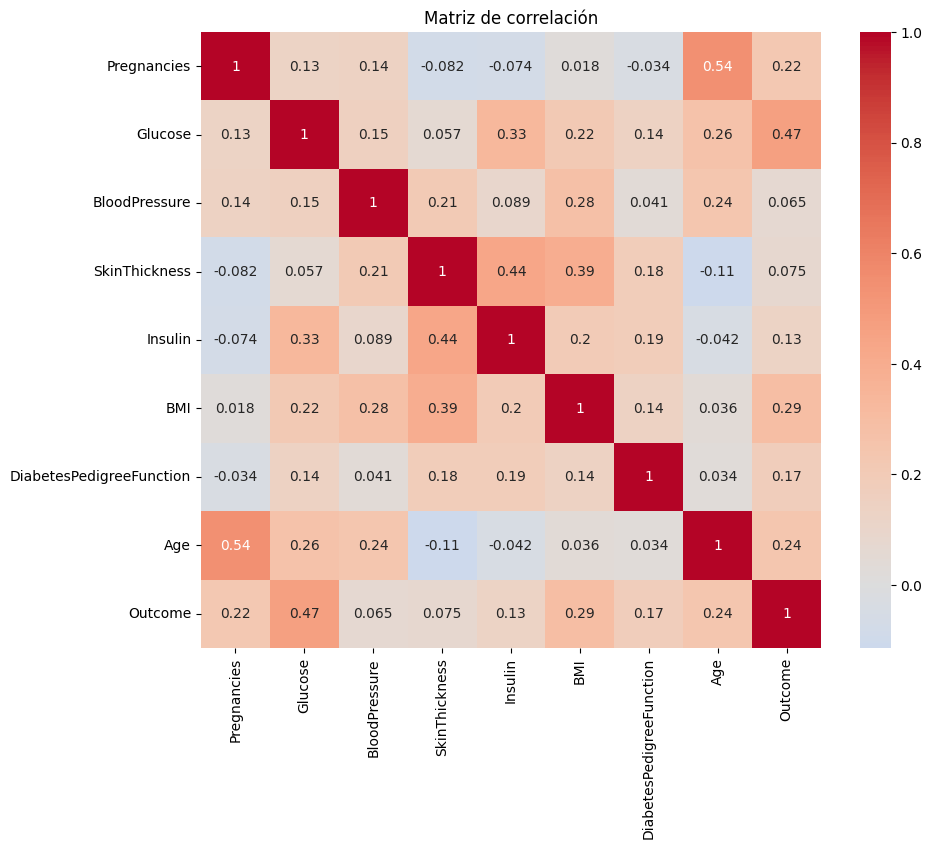

In [137]:
#Verificando correlaciones entre todas las variables

# Calculo de la matriz de correlación
corr_matriz = df.corr()

# Dibujar el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matriz, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()



Observaciones:

-Pregnancies tiene una correlacion moderada de 0.54 con Age. Y ambas una correlacion de 0.22 y 0.24 con Outcome, respectivamente, por lo que cualquiera de las dos pudiera seleccionarse como variable predictora de Outcome.

-Glucose tiene una correlacion moderada baja de 0.33 con Insulin. Mientras que Glucose tiene una correlacion de 0.47 con Outcome, por lo que se usara Glucose como variable predictora de Outcome.

-Bmi tiene una correlacion con SkinThickness de 0.39, y de 0.29 con Outcome. Adicionalmente, tiene una correlacion de 0.28,   0.22 y 0.2 con BloodPressure, Glucose e Insulin, respectivamente, por lo tanto  BMI sera una de las variables predictoras.

Adicionalmente, se usara la variable DiabetesPedigreeFunction para predecir Outcome dada la importancia de dicha variable (indice genetica o hereditaria de tener diabetes), aun cuando su correlacion es relativamente baja con 0.17.

Se descartan el resto de las variables en virtud de la correlacion media o moderada baja que puedan tener con las variables que se usaran como predictoras.

**variables a usar como predictoras de Outcome**

age, glucose, bmi, diabetespedigreefunction

Sin embargo, veamos graficamente como se comportan todas las variables del df en las categorias de Outcome, estandarizando antes las variables para evitar confusiones con aquellas que tienen mayores magnitudes.

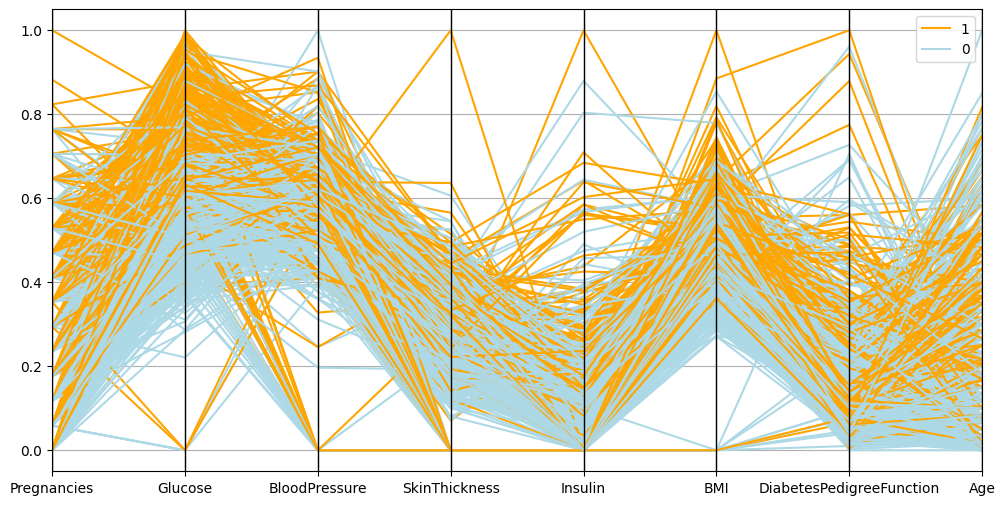

In [162]:
from sklearn.preprocessing import MinMaxScaler

# Creamos el scaler
scaler = MinMaxScaler()

# Normalizamos todas las columnas numéricas excepto la de Outcome
scaled_values = scaler.fit_transform(df.drop("Outcome", axis=1))

# Armamos un nuevo DataFrame con los valores normalizados
scaled_df = pd.DataFrame(scaled_values, columns=df.columns[:-1])

# Agregamos la columna Outcome original
scaled_df["Outcome"] = df["Outcome"]

# Graficamos usando la copia normalizada
plt.figure(figsize=(12,6))
pd.plotting.parallel_coordinates(
    scaled_df,
    "Outcome",
    color=["orange", "lightblue"]
)
plt.show()




Como era de esperarse las variables Glucose y BMI tienen mayor concentracion de lineas naranjas, por lo tanto tienen mayor incidencia en el grupo de enfermos, mientras que Age y DiabetesPedigreeFunction tienen menos poder discriminante al encontrarse mas dispersas en la grafica.

In [139]:
df_reducido = df[['Age', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']]

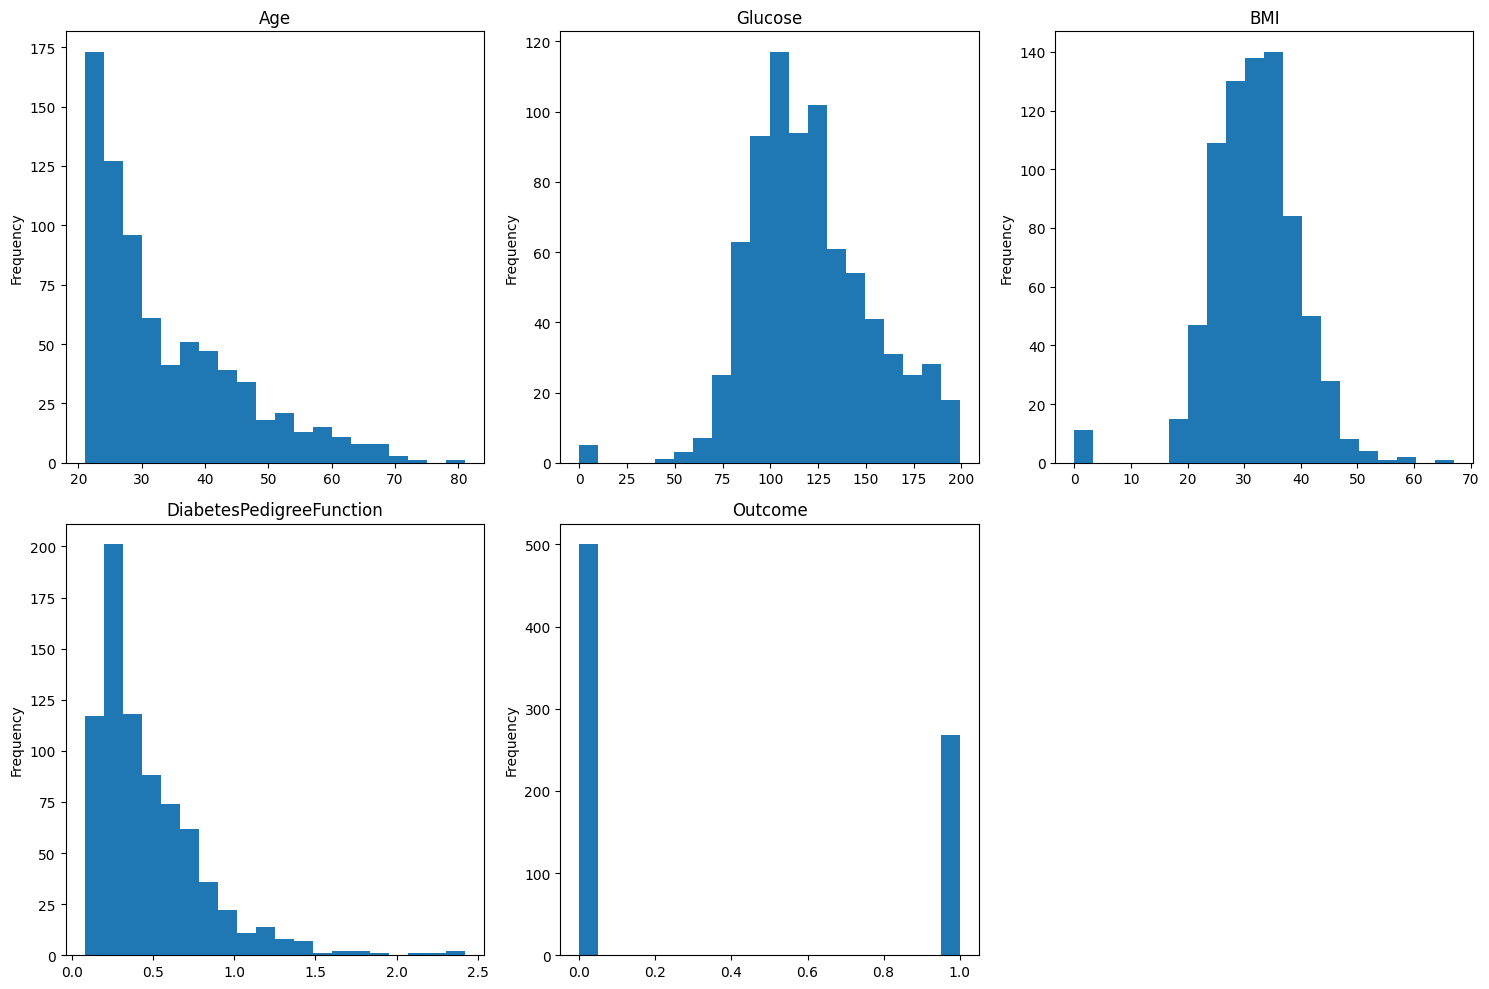

In [140]:
#Graficando como se comportan las variables antes de hacerle los test para ver
#si tienen un comportamiento normal o no

import matplotlib.pyplot as plt

ncols = 3
cols = df_reducido.columns
nrows = (len(cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))

i = 0
for row in range(nrows):
    for col_axis in range(ncols):
        if i >= len(cols):
            axes[row, col_axis].set_visible(False)  # oculta los sobrantes
        else:
            colname = cols[i]
            if df_reducido[colname].dtype == 'object':
                df_reducido[colname].value_counts().plot(kind='bar', ax=axes[row, col_axis])
            else:
                df_reducido[colname].plot(kind='hist', bins=20, ax=axes[row, col_axis])
            axes[row, col_axis].set_title(colname)
        i += 1

plt.tight_layout()
plt.show()

In [141]:
#verificando normalidad en las variables usando el test de Shapiro
#no se incluye la variable Outcome

columns = [
   "Age", "Glucose", "BMI", "DiabetesPedigreeFunction"
]
shapiro_results = {}

for column in columns:
    statistic, p_value = shapiro(df_reducido[column])
    shapiro_results[column] = {'statistic': statistic, 'p_value': p_value}
    print(f'{column},  p-value: {p_value}')

Age,  p-value: 2.4022741290400888e-24
Glucose,  p-value: 1.9863474999979633e-11
BMI,  p-value: 1.8416516138516335e-15
DiabetesPedigreeFunction,  p-value: 2.477505530854268e-27


Como en todas las variables pvalue < 0.05, se rechaza H0 y se aceptaria H1, es decir con los datos no se puede concluir que las variables propuestas como predictoras sigan una distribucion normal, por lo tanto se consideran nonnormales.

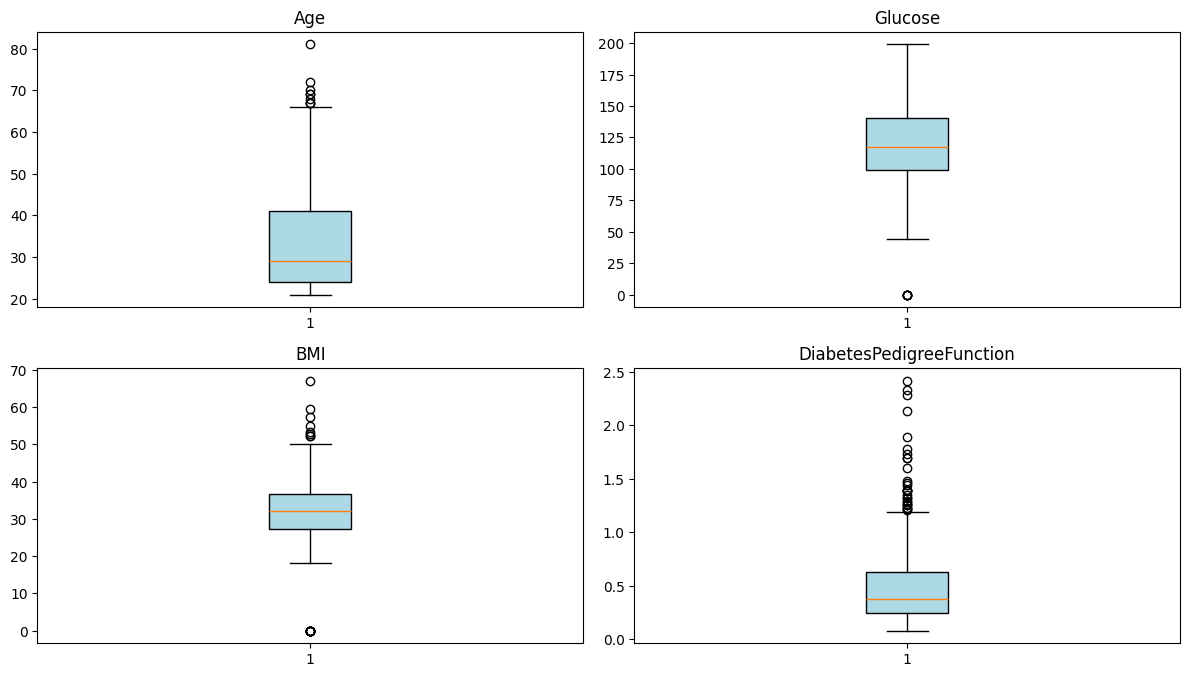

In [142]:
#graficando verificando como se comportan los datos en las variables nonnormales

columns = [
     "Age", "Glucose", "BMI", "DiabetesPedigreeFunction"
]

plt.figure(figsize=(12, 10))  # más alto para acomodar varias filas
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)  # 2 filas, 2 columnas
    plt.boxplot(df_reducido[col],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    plt.title(col)

plt.tight_layout()
plt.show()

df_reducido[ ['Age']>80]

In [143]:
df_reducido[ df_reducido['Age']>80]

,Age,Glucose,BMI,DiabetesPedigreeFunction,Outcome
459,81,134,25.9,0.46,0


In [144]:
df_reducido[ df_reducido['BMI']>55]

,Age,Glucose,BMI,DiabetesPedigreeFunction,Outcome
177,26,129,67.1,0.319,1
445,25,180,59.4,2.420,1
673,22,123,57.3,0.880,0


In [145]:
df_reducido[ df_reducido['BMI']<20].head(5)

,Age,Glucose,BMI,DiabetesPedigreeFunction,Outcome
9,54,125,0.0,0.232,1
33,28,92,19.9,0.188,0
49,24,105,0.0,0.305,0
50,22,103,19.4,0.491,0
60,21,84,0.0,0.304,0


Es algo atipico que se presenten casos de BMI mayor a 50 pero no imposible.

Por otro lado, se observan valores BMI iguales a cero, lo cual es imposible, por lo tanto seran elimnados dichos registros de la base de datos.

In [146]:
df_reducido[ df_reducido['DiabetesPedigreeFunction']>1.5].head(5)

,Age,Glucose,BMI,DiabetesPedigreeFunction,Outcome
4,33,137,43.1,2.288,1
45,25,180,42.0,1.893,1
58,44,146,40.5,1.781,0
228,31,197,36.7,2.329,0
370,25,173,38.4,2.137,1


Este indice de DiabetesPedigreeFunction suele tener valores entre 0.08 y 2.42, por lo tanto no existen valores irreales.

**Base de Datos reducida sobre la cual se aplicara el modelo de Decision-Tree**

In [147]:
df_reducido = df_reducido.drop(df_reducido[df_reducido['BMI']==0].index)


In [148]:
df_reducido.shape

(757, 5)

In [149]:
df_reducido.head(3)

,Age,Glucose,BMI,DiabetesPedigreeFunction,Outcome
0,50,148,33.6,0.627,1
1,31,85,26.6,0.351,0
2,32,183,23.3,0.672,1


**Aplicacion del modelo Decision-Tree**

Como el caso de estudio se refiere a la presencia o ausencia de diabetes, clasficacion binaria, entonces el Arbol de Decision a aplicar es de clasificacion

In [150]:
#Declarando las variables

y = df_reducido['Outcome']
X = df_reducido.drop(columns='Outcome')

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=124 )

**Entrenando con el criterio gini**

In [153]:
robot_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
robot_gini.fit(X_train, y_train)
y_pred_gini = robot_gini.predict(X_test)

print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

           0       0.81      0.74      0.77       160
           1       0.49      0.60      0.54        68

    accuracy                           0.70       228
   macro avg       0.65      0.67      0.66       228
weighted avg       0.72      0.70      0.70       228



**Usando el criterio entropy**

In [154]:
robot_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
robot_entropy.fit(X_train, y_train)
y_pred_entropy = robot_entropy.predict(X_test)

print(classification_report(y_test, y_pred_entropy))


              precision    recall  f1-score   support

           0       0.84      0.74      0.79       160
           1       0.52      0.66      0.58        68

    accuracy                           0.72       228
   macro avg       0.68      0.70      0.69       228
weighted avg       0.74      0.72      0.73       228



**Grafico para comparar precision aplicando los criterios de pureza gini o entropia**

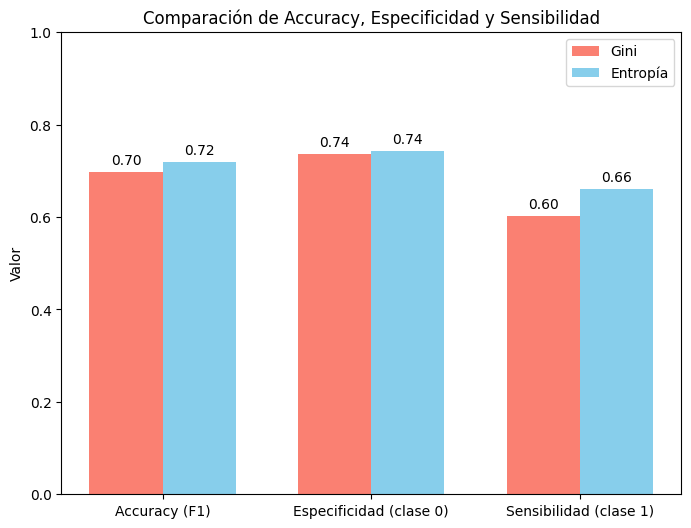

In [156]:
report_gini = classification_report(y_test, y_pred_gini, output_dict=True)
report_entropy = classification_report(y_test, y_pred_entropy, output_dict=True)

# Extraer métricas
metrics_gini = {
    "Accuracy (F1)": accuracy_score(y_test, y_pred_gini),
    "Especificidad (clase 0)": report_gini['0']['recall'],
    "Sensibilidad (clase 1)": report_gini['1']['recall']
}

metrics_entropy = {
    "Accuracy (F1)": accuracy_score(y_test, y_pred_entropy),
    "Especificidad (clase 0)": report_entropy['0']['recall'],
    "Sensibilidad (clase 1)": report_entropy['1']['recall']
}

# Graficar
labels = list(metrics_gini.keys())
gini_values = list(metrics_gini.values())
entropy_values = list(metrics_entropy.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, gini_values, width, label="Gini", color="salmon")
rects2 = ax.bar(x + width/2, entropy_values, width, label="Entropía", color="skyblue")

ax.set_ylabel("Valor")
ax.set_title("Comparación de Accuracy, Especificidad y Sensibilidad")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,1)
ax.legend()

# Mostrar valores encima de las barras
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3), textcoords="offset points",
                    ha='center', va='bottom')

plt.show()



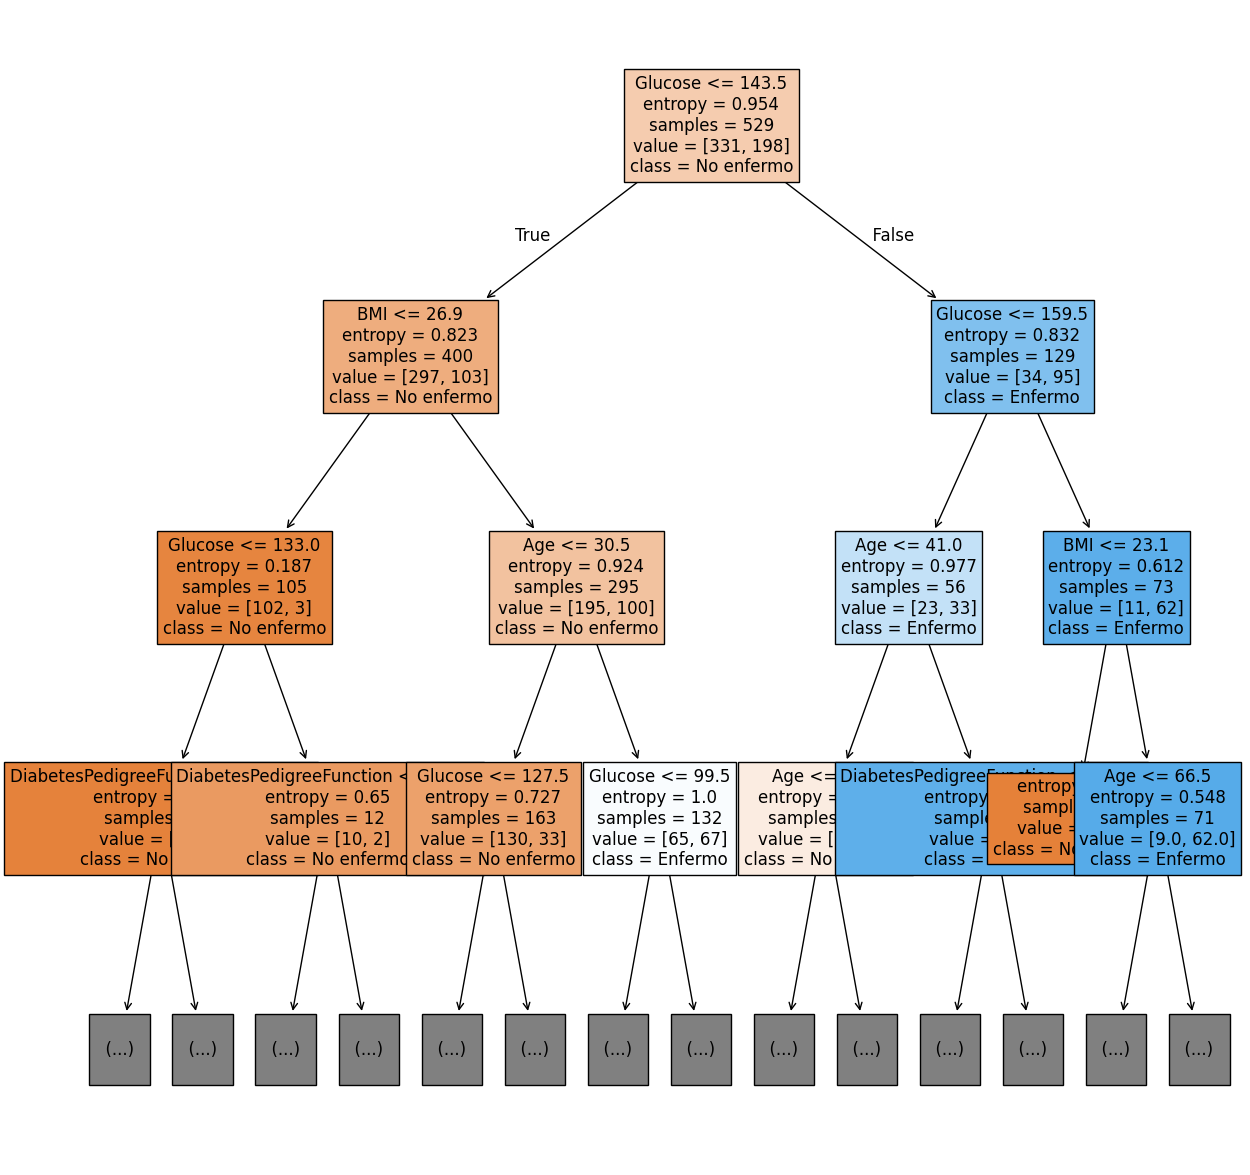

In [155]:
#Graficando los 3 primeros nodos del arbol aplicando el criterio de entropia
#a objeto de visualizar como va haciendo las particiones

fig = plt.figure(figsize=(15,15))
tree.plot_tree(
    robot_entropy,
    feature_names=list(X_train.columns),
    class_names=["No enfermo", "Enfermo"],
    filled=True,
    fontsize=12,
    max_depth=3   # solo hasta el nivel 3
)
plt.show()


**Observaciones**

Entrenando el Arbol de Decision con los criterios "Gini' y "Entropia" se observa que este ultimo se encuentra por encima del criterio "Gini" en Accuracy (0.72) y Sensibilidad (0.66). Mientras que hay igualdad de resultados en Especificidad  (0.74).

Un Accuracy 0.72 implica que el 72% de los individuos fueron clasificados correctamente.

Una Sensibilidad 0.66, significa que hay un 66% de probabilidad de obtener un enfermo dado que es enfermo.

Una Especificidad de 0.74, se traduce que hay un 74% de probabilidad de obtener un sano dado que es sano.



**Optimizacion de los resultados con el metodo Grid Search**

In [165]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'class_weight' :  [{0:0.05, 1:0.95},
                     {0:0.5, 1:0.5}],
    'max_depth' : [5, 7, 10, 15, 18, 26, 40],
    'min_samples_leaf': [5, 10, 12, 15, 18, 20],
    'min_samples_split': [2, 7, 10, 12, 22, 33, 40]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
# Entrenar con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Imprimir reportes
print("Mejores parámetros encontrados:\n", grid_search.best_params_)
print("\nReporte del mejor modelo:\n")
print(classification_report(y_test, y_pred_best))


Mejores parámetros encontrados:
 {'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 22}

Reporte del mejor modelo:

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       160
           1       0.55      0.63      0.59        68

    accuracy                           0.74       228
   macro avg       0.69      0.71      0.70       228
weighted avg       0.75      0.74      0.74       228



Resultados:

El mejor resultado del Metodo de la Grilla es con los siguientes criterios: 'class_weight': {0: 0.5, 1: 0.5} (pesos iguales para ambas categorias), 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 22. Dando un accuracy = 0.74 (74% de aciertos), Especificidad= 0.78 (78% acertando sano dado que es sano) y Sensibilidad=0.63 (63% acertando enfermo dado que es enfermo).

Cabe destacar que antes de aplicar el metodo de la Grilla, se tenia 72% Accuracy, 74% Especificidad y 66% Sensibilidad.

Es decir el metodo de la Grilla ayuda en primera instancia a mejorar el accuracy y la Especificidad, sin embargo la Sensibilidad tuvo un valor un poco inferior.


**Buscando mejorar la Sensibilidad usando scoring='recall' dentro de la Grilla**

In [166]:
param_grid_2 = {
    'criterion': ['gini', 'entropy'],
    'class_weight' :  [{0:0.05, 1:0.95},
                     {0:0.5, 1:0.5}],
    'max_depth' : [5, 7, 10, 15, 18, 26, 40],
    'min_samples_leaf': [5, 10, 12, 15, 18, 20],
    'min_samples_split': [2, 7, 10, 12, 22, 33, 40]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_2,
    cv=5,
    scoring='recall'
)
# Entrenar con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Imprimir reportes
print("Mejores parámetros encontrados:\n", grid_search.best_params_)
print("\nReporte del mejor modelo:\n")
print(classification_report(y_test, y_pred_best))

Mejores parámetros encontrados:
 {'class_weight': {0: 0.05, 1: 0.95}, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2}

Reporte del mejor modelo:

              precision    recall  f1-score   support

           0       0.96      0.33      0.49       160
           1       0.38      0.97      0.55        68

    accuracy                           0.52       228
   macro avg       0.67      0.65      0.52       228
weighted avg       0.79      0.52      0.50       228



Corriendo nuevamente el metodo de la Grilla estableciendo como scoring = 'recall', se obtiene mejoras en la Sensibilidad = 0.97, sacrificando Especificidad 0.33 y accuracy 0.52, por lo que el modelo detecta casi todos los enfermos con un 97% de probabilidad pero se equivoca al clasificarlos (precision 0.38).

**Conclusion**

Efectivamente las variables consideradas pueden ser buenas predictoras de la Diabetes, sin embargo hay que tomar en consideracion que dependiendo del objetivo del problema se hace relevante evaluar el accuracy o la sensibilidad.

Es otras palabras, si el objetivo es no perder positivos (ejemplos: casos medicos, deteccion de fraude, prestamos, etc) entonces la sensibilidad esta es mas importante que el accuracy.

Si por el contrario, se busca exactitud global sin importar que clase se favorece, entonces accuracy es la metrica a priorizar.